Importing necessary packages 

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


a) Import the given “Salary_Data.csv”

In [200]:
data = pd.read_csv("Salary_Data.csv") #Loading of the data


In [201]:
data.head() #first five rows of data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [202]:
data.dtypes #type of data

YearsExperience    float64
Salary             float64
dtype: object

In [203]:
data.Salary.describe() #basic math operations like mean standard deviation etc.,

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

In [204]:
data.YearsExperience.describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

In [205]:
data.Salary.unique()

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [206]:
data.YearsExperience.unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [207]:
print(data.isnull().sum())  # Check for null values
data.fillna(data.mean(), inplace=True)  # Replacing all the null values with the mean data for the particular column

YearsExperience    0
Salary             0
dtype: int64


b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.


In [208]:
X = data[['YearsExperience']] 
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


c) Train and predict the model.

In [209]:
from sklearn.preprocessing import StandardScaler #Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [210]:
grid = GridSearchCV(model, params, cv=5)


In [211]:
linear_regression = LinearRegression().fit(X_train, y_train)

In [212]:
y_pred = linear_regression.predict(X_test)


d) Calculate the mean_squared error

In [213]:
print('Mean squared error: ', mean_squared_error(y_test, y_pred))


Mean squared error:  37412814.87941284


e) Visualize both train and test data using scatter plot

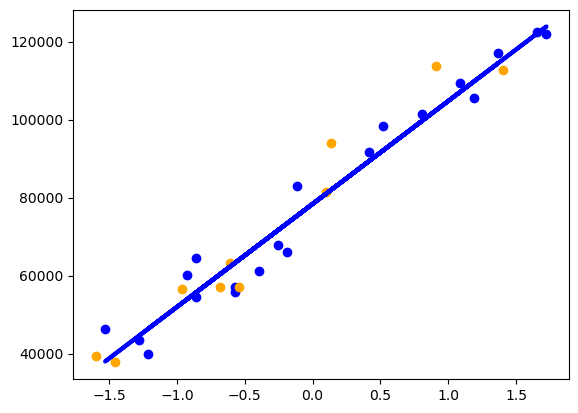

In [214]:
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='orange')
plt.plot(X_train, linear_regression.predict(X_train), color='blue', linewidth=3)
plt.show()
